## Maestría en Inteligencia Artificial Aplicada (MNA)
### Proyecto Integrador
### Dra. Grettel Barceló Alonso / Dr. Carlos Alberto Villaseñor Padilla
### Avance 2. Ingeniería de características

### Integrantes
- A01794457 - Iossif Moises Palli Laura
- A01793984 - Brenda Zurazy Rodríguez Pérez
- A01794630 - Jesús Ramseths Echeverría Rivera

In [1]:
# Paqueterías a utilizar
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from spacy import displacy

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### I. Carga de los datos

In [ ]:
df = pd.read_excel('../content/q_a_db.xlsx') # Se realiza la carga del conjunto de preguntas y respuestas
df.head()

date                                           question  \
0 2001-06-04  ¿Qué fecha fue publicada la Ley de Fondos de I...   
1 2001-06-04         ¿Qué regula la Ley de Fondos de Inversión?   
2 2001-06-04      ¿Qué debe fomentar la aplicación de esta ley?   
3 2001-06-04             ¿Qué es un activo objeto de inversión?   
4 2001-06-04   ¿Quién regula los fondos de inversión en México?   

                                              answer             category  
0                             El 4 de junio de 2001.  Fondos de Inversión  
1  Regula la organización y funcionamiento de los...  Fondos de Inversión  
2  El desarrollo equilibrado y la diversificación...  Fondos de Inversión  
3  Son valores títulos y documentos aplicables al...  Fondos de Inversión  
4        La Comisión Nacional Bancaria y de Valores.  Fondos de Inversión

### II. Construcción

Limpieza de datos

In [3]:
# Ajustar las opciones de pandas para que se vea el texto completo en las columnas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/integra/q_a_db.csv') # Se realiza la carga del conjunto de preguntas y respuestas
df.sample(20)

date  \
750  2024-01-24   
636  2012-10-17   
807  2005-12-30   
977  2022-12-12   
276  1990-07-18   
164  1990-07-18   
531  2008-08-20   
912  2005-12-30   
878  2005-12-30   
323  2018-09-03   
566  2008-08-20   
738  2014-01-10   
748  2024-01-24   
477  2024-01-24   
261  1990-07-18   
279  1990-07-18   
828  2005-12-30   
964  2022-12-12   
181  1990-07-18   
767  2024-01-24   

                                                                                       question  \
750                                                  ¿Qué se entiende por Usuario según la ley?   
636          ¿Qué ocurre si un infractor cumple de manera espontánea antes de una verificación?   
807                                                         ¿Qué es la capitalización bursátil?   
977                                                      ¿Qué es el recurso de reconsideración?   
276                        ¿Qué es la responsabilidad fiduciaria en una institución de crédito?   
164                                    ¿Quién nombra al director general de una banca múltiple?   
531                        ¿Qué sucede si una unión otorga un crédito sin un análisis adecuado?   
912           ¿Cómo se determina la proporcionalidad de las sanciones impuestas a los emisores?   
878                                      ¿Qué dice el artículo 53 sobre la custodia de valores?   
323  ¿Qué debe incluir el plan de negocios presentado por una ITF al solicitar su autorización?   
566            ¿Qué obligaciones tienen las uniones respecto al uso de las reservas de capital?   
738  ¿Qué establece el artículo 34 sobre los consejeros suplentes de una Sociedad Controladora?   
748         ¿Cuándo fue publicada la Ley para Regular las Sociedades de Información Crediticia?   
477  ¿Qué establece la ley sobre las operaciones de financiamiento en mercados internacionales?   
261        ¿Qué sanciones se aplican si una institución oculta información relevante a la CNBV?   
279                      ¿Qué tipo de créditos puede otorgar una institución de banca múltiple?   
828                                           ¿Qué implica el principio de revelación continua?   
964                                  ¿Qué se debe hacer si un sistema de pagos sufre una falla?   
181                                   ¿Qué requisitos debe cumplir una asamblea de accionistas?   
767                ¿Qué procedimiento deben seguir las sociedades ante una queja de un Cliente?   

                                                                                                                                                                                  answer  \
750                Un Usuario es cualquier entidad financiera empresa comercial o sofom E.N.R. que proporciona información o realiza consultas a una sociedad de información crediticia.   
636                                    La Secretaría puede abstenerse de sancionar al infractor por una sola vez siempre y cuando cumpla antes de una verificación y reconozca la falta.   
807                                                                                        Es el valor total de mercado de las acciones en circulación de una empresa cotizada en bolsa.   
977                                                                                                                Es un medio para impugnar sanciones impuestas por el Banco de México.   
276                                                                                               El deber de actuar en beneficio de los clientes protegiendo sus intereses financieros.   
164                                                                                                                                                        El consejo de administración.   
531                                                                                                                        Puede ser sancionada por incumplir las disposiciones legales.   
912                        

In [7]:
# Cambiar a tipo de fecha
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')

# Eliminar filas duplicadas de las variables 'question' y 'answer'
df_clean = df.drop_duplicates(subset=['question', 'answer'])

# Eliminar espacios en blanco extra al principio y al final en las columnas de texto
df_clean['question'] = df_clean['question'].str.strip()
df_clean['answer'] = df_clean['answer'].str.strip()
df_clean['category'] = df_clean['category'].str.strip()

In [8]:
df_clean.head()

date                                                 question  \
0  2001-06-04  ¿Qué fecha fue publicada la Ley de Fondos de Inversión?   
1  2001-06-04               ¿Qué regula la Ley de Fondos de Inversión?   
2  2001-06-04            ¿Qué debe fomentar la aplicación de esta ley?   
3  2001-06-04                   ¿Qué es un activo objeto de inversión?   
4  2001-06-04         ¿Quién regula los fondos de inversión en México?   

                                                                                     answer  \
0                                                                    El 4 de junio de 2001.   
1                       Regula la organización y funcionamiento de los fondos de inversión.   
2                               El desarrollo equilibrado y la diversificación del capital.   
3  Son valores títulos y documentos aplicables al régimen de la Ley del Mercado de Valores.   
4                                               La Comisión Nacional Bancaria y de Valores.   

              category  
0  Fondos de Inversión  
1  Fondos de Inversión  
2  Fondos de Inversión  
3  Fondos de Inversión  
4  Fondos de Inversión

In [12]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['question'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df

10  105  108   12   13   14   15   16   17   18   19   20   21   22   23   25   26   28  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1138  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1139  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1140  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1141  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1142  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       30   32   33   34   37   38   39   3º   40   41   45   48   50   51   52   53   58   5º  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1138  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1139  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1140  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1141  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1142  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       60   63   65   68   72   75   7º   80   85   90   95  abierto  abiertos  abusiva  acceso  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0       0.0      0.0     0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0       0.0      0.0     0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0       0.0      0.0     0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0       0.0      0.0     0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0       0.0      0.0     0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...       ...      ...     ...   
1138  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0       0.0      0.0     0.0   
1139  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0       0.0      0.0     0.0   
1140  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0       0.0      0.0     0.0   
1141  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0       0.0      0.0     0.0   
1142  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.0       0.0      0.0     0.0   

      accionaria  acciones  accionista  accionistas  acción  acelerada  aceptada  aceptadas  \
0            0.0  0.000000         0.0          0.0     0.0        0.0       0.0        0.0   
1            0.0  0.000000         0.0          0.0     0.0        0.0       0.0        0.0   
2            0.0  0.000000         0.0          0.0     0.0        0.0       0.0        0.0   
3            0.0  0.000000         0.0          0.0     0.0        0.0       0.0    



*   Se utiliza TfidfVectorizer para calcular la importancia de las palabras en las preguntas. La salida es una matriz donde cada fila representa una pregunta y cada columna representa un término con su valor TF-IDF.



In [25]:
ngram_vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
ngram_matrix = ngram_vectorizer.fit_transform(df['question'])
ngram_df = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())
ngram_df

10 sobre  10 sobre la  105 la  105 la ley  108 la  108 la ley  12 sobre  12 sobre la  \
0            0            0       0           0       0           0         0            0   
1            0            0       0           0       0           0         0            0   
2            0            0       0           0       0           0         0            0   
3            0            0       0           0       0           0         0            0   
4            0            0       0           0       0           0         0            0   
...        ...          ...     ...         ...     ...         ...       ...          ...   
1138         0            0       0           0       0           0         0            0   
1139         0            0       0           0       0           0         0            0   
1140         0            0       0           0       0           0         0            0   
1141         0            0       0           0       0           0         0            0   
1142         0            0       0           0       0           0         0            0   

      13 sobre  13 sobre las  14 bis  14 bis sobre  15 sobre  15 sobre la  16 sobre  16 sobre la  \
0            0             0       0             0         0            0         0            0   
1            0             0       0             0         0            0         0            0   
2            0             0       0             0         0            0         0            0   
3            0             0       0             0         0            0         0            0   
4            0             0       0             0         0            0         0            0   
...        ...           ...     ...           ...       ...          ...       ...          ...   
1138         0             0       0             0         0            0         0            0   
1139         0             0       0             0         0            0         0            0   
1140         0             0       0             0         0            0         0            0   
1141         0             0       0             0         0            0         0            0   
1142         0             0       0             0         0            0         0            0   

      18 sobre  18 sobre la  19 sobre  19 sobre la  19 sobre las  20 acciones  20 acciones una  \
0            0            0         0            0             0            0                0   
1            0            0         0            0             0            0                0   
2            0            0         0            0             0            0                0   
3            0            0         0            0             0            0                0   
4            0            0         0            0             0            0                0   
...        ...          ...       ...          ...           ...          ...              ...   
1138         0            0         0            0             0            0                0   
1139         0            0         0            0             0            0                0   
1140         0            0         0            0             0            0                0   
1141         0            0         0            0             0            0                0   
1142         0            0         0            0             0            0                0   

      20 las  20 las acciones  20 sobre  20 sobre las  20 sobre los  21 sobre  21 sobre los  \
0          0                0         0             0             0         0             0   
1          0                0         0             0             0         0             0   
2          0                0         0             0             0         0             0   
3          0                0         0             0             0         0             0   
4          0            



*   Con CountVectorizer se generan secuencias de palabras en bigramas y trigramas. Esto permite capturar patrones de frases completas en lugar de palabras individuales



In [15]:
nlp = spacy.load('en_core_web_sm')

In [19]:
### Lematización/Stemming
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

def lemmatize_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokens)


In [20]:
df['lemmatized_question'] = df['question'].apply(lemmatize_text)

In [21]:
df[['question', 'lemmatized_question']]

question  \
0                      ¿Qué fecha fue publicada la Ley de Fondos de Inversión?   
1                                   ¿Qué regula la Ley de Fondos de Inversión?   
2                                ¿Qué debe fomentar la aplicación de esta ley?   
3                                       ¿Qué es un activo objeto de inversión?   
4                             ¿Quién regula los fondos de inversión en México?   
...                                                                        ...   
1138                     ¿Qué ocurre si no se corrige una infracción continua?   
1139            ¿Qué medidas correctivas existen en caso de fallo del sistema?   
1140  ¿Qué acciones puede tomar el Banco de México si detecta irregularidades?   
1141              ¿Qué significa la compensación bruta en un sistema de pagos?   
1142                            ¿Qué mecanismos existen para prevenir fraudes?   

                                               lemmatized_question  
0                             fecha publicada ley fondos inversión  
1                                      regula ley fondos inversión  
2                                     debe fomentar aplicación ley  
3                                          activo objeto inversión  
4                                   regula fondos inversión méxico  
...                                                            ...  
1138                        ocurre si corrige infracción continuum  
1139                medidas correctivas existen caso fallo sistema  
1140  acciones puede tomar banco méxico si detecta irregularidades  
1141                    significa compensación bruta sistema pagos  
1142                           mecanismos existen prevenir fraudes  

[1143 rows x 2 columns]



*   Con WordNetLemmatizer reducimos las palabras a su forma base (lema) para unificar términos similares. Además, eliminamos las palabras vacías o "stop words".



In [22]:
### 5. POS-Tagging (Part-of-Speech)
def pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return pos_tags

df['pos_tags'] = df['question'].apply(pos_tagging)

In [23]:
df[['question', 'pos_tags']]

question  \
0                      ¿Qué fecha fue publicada la Ley de Fondos de Inversión?   
1                                   ¿Qué regula la Ley de Fondos de Inversión?   
2                                ¿Qué debe fomentar la aplicación de esta ley?   
3                                       ¿Qué es un activo objeto de inversión?   
4                             ¿Quién regula los fondos de inversión en México?   
...                                                                        ...   
1138                     ¿Qué ocurre si no se corrige una infracción continua?   
1139            ¿Qué medidas correctivas existen en caso de fallo del sistema?   
1140  ¿Qué acciones puede tomar el Banco de México si detecta irregularidades?   
1141              ¿Qué significa la compensación bruta en un sistema de pagos?   
1142                            ¿Qué mecanismos existen para prevenir fraudes?   

                                                                                                                                                                 pos_tags  
0                                [(¿Qué, JJ), (fecha, NN), (fue, NN), (publicada, NN), (la, FW), (Ley, NNP), (de, FW), (Fondos, NNP), (de, FW), (Inversión, NNP), (?, .)]  
1                                                           [(¿Qué, JJ), (regula, NN), (la, NN), (Ley, NNP), (de, FW), (Fondos, NNP), (de, FW), (Inversión, NNP), (?, .)]  
2                                                           [(¿Qué, JJ), (debe, NN), (fomentar, NN), (la, FW), (aplicación, FW), (de, FW), (esta, FW), (ley, NN), (?, .)]  
3                                                                         [(¿Qué, JJ), (es, NN), (un, JJ), (activo, JJ), (objeto, NN), (de, IN), (inversión, FW), (?, .)]  
4                                                       [(¿Quién, JJ), (regula, NN), (los, NN), (fondos, NN), (de, IN), (inversión, FW), (en, FW), (México, NNP), (?, .)]  
...                                                                                                                                                                   ...  
1138                                         [(¿Qué, JJ), (ocurre, MD), (si, VB), (no, DT), (se, NN), (corrige, NN), (una, JJ), (infracción, NN), (continua, NN), (?, .)]  
1139                       [(¿Qué, JJ), (medidas, NNS), (correctivas, VBP), (existen, JJ), (en, FW), (caso, NN), (de, IN), (fallo, FW), (del, FW), (sistema, NN), (?, .)]  
1140  [(¿Qué, JJ), (acciones, NNS), (puede, VBP), (tomar, NN), (el, NN), (Banco, NNP), (de, IN), (México, NNP), (si, VBD), (detecta, NN), (irregularidades, NNS), (?, .)]  
1141                           [(¿Qué, NN), (significa, NN), (la, NN), (compensación, NN), (bruta, NN), (en, IN), (un, JJ), (sistema, NN), (de, IN), (pagos, FW), (?, .)]  
1142                                                                  [(¿Qué, JJ), (mecanismos, NNS), (existen, VBP), (para, JJ), (prevenir, NN), (fraudes, NNS), (?, .)]  

[1143 rows x 2 columns]



*   Utilizamos nltk.pos_tag para etiquetar cada palabra con su función gramatical (sustantivos, verbos, etc.), lo que puede ser útil para analizar la estructura de las preguntas y respuestas.



### III. Normalización

Ahora podemos tokenizar cada enunciado de las variables 'question' y 'answer', es decir vamos a dividir el texto en unidades más pequeñas, llamadas tokens.
Estos tokens pueden ser palabras, frases o incluso caracteres. Es un paso fundamental en el procesamiento de lenguaje natural (PLN) porque convierte el texto en una forma más manejable para análisis o modelado.

In [ ]:
# Descargar los recursos necesarios de nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenizar las preguntas ('question') y respuestas ('answer')
df_clean['question_tokens'] = df_clean['question'].apply(word_tokenize)
df_clean['answer_tokens'] = df_clean['answer'].apply(word_tokenize)

In [ ]:
# Mostrar algunas filas con las nuevas columnas tokenizadas
print(df_clean[['question', 'question_tokens', 'answer', 'answer_tokens']].head())

                                            question  \
0  ¿Qué fecha fue publicada la Ley de Fondos de I...   
1         ¿Qué regula la Ley de Fondos de Inversión?   
2      ¿Qué debe fomentar la aplicación de esta ley?   
3             ¿Qué es un activo objeto de inversión?   
4   ¿Quién regula los fondos de inversión en México?   

                                     question_tokens  \
0  [¿Qué, fecha, fue, publicada, la, Ley, de, Fon...   
1  [¿Qué, regula, la, Ley, de, Fondos, de, Invers...   
2  [¿Qué, debe, fomentar, la, aplicación, de, est...   
3   [¿Qué, es, un, activo, objeto, de, inversión, ?]   
4  [¿Quién, regula, los, fondos, de, inversión, e...   

                                              answer  \
0                             El 4 de junio de 2001.   
1  Regula la organización y funcionamiento de los...   
2  El desarrollo equilibrado y la diversificación...   
3  Son valores títulos y documentos aplicables al...   
4        La Comisión Nacional Bancaria y de Va

### IV. Selección / Extracción

Otra de las etapas importantes en el proceso de preparación es la eliminación de las stopwords.

In [ ]:
# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Obtener la lista de stop words en español
stop_words = set(stopwords.words('spanish'))

In [ ]:
# Eliminar stop words de las preguntas y respuestas
df_clean['question_tokens'] = df_clean['question_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df_clean['answer_tokens'] = df_clean['answer_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

Nube de Palabras (Word Cloud)

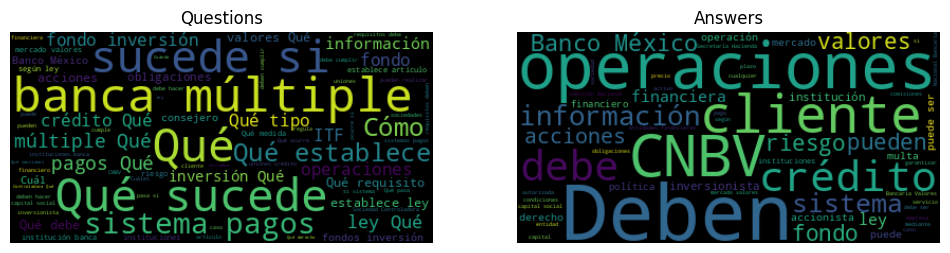

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))

# Combinar todas las preguntas tokenizadas en una sola cadena de texto
all_questions = ' '.join([' '.join(tokens) for tokens in df_clean['question_tokens']])
all_answers = ' '.join([' '.join(tokens) for tokens in df_clean['answer_tokens']])

# Nube de palabras de las preguntas:
wordcloudnn = WordCloud().generate(all_questions)
ax1.imshow(wordcloudnn, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Questions')

# Nube de palabras de las respuestas:
wordcloudnn = WordCloud().generate(all_answers)
ax2.imshow(wordcloudnn, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Answers')

plt.show()

### V. Conclusiones